In [1]:
# import libraies

import pandas as pd 
import numpy as np

In [2]:
# Load dataset and over view

df1 = pd.read_csv("merged_cleaned_data.csv")

In [3]:
print(df1.shape)
df1.head()

(24748, 4)


,label,price,product_category_name,delivery_days
0,1,29.99,housewares,242
1,1,38.25,toys,13
2,1,132.40,perfumery,334
3,0,39.50,baby,27
4,0,90.90,baby,41


In [4]:
#checking null values

df1.isnull().sum()

label                    0
price                    0
product_category_name    0
delivery_days            0
dtype: int64

In [5]:
df1_a = df1[df1.label==1]
df1_a.shape

(18136, 4)

## Outlier detection and remove
### in delivery day, it is good if the product is delivered within 1 month or 2 month or 3 month.. But if it is more than 3 month (90 days), we can assume that as outlier.. so we have to remove those data

In [6]:
df1[df1["delivery_days"]>90].shape

(7494, 4)

In [7]:
# Removing the outlier

df2 = df1[~(df1["delivery_days"]>90)]
df2.shape

(17254, 4)

In [8]:
df2.sample(5)

,label,price,product_category_name,delivery_days
6326,1,17.33,sports_leisure,25
22056,1,35.00,sports_leisure,27
9902,0,359.99,housewares,16
14736,0,49.90,auto,16
3531,1,59.90,garden_tools,49


## Remove outlier (Quantile method) in Price column

In [9]:
max_thresold = df2.price.quantile(0.95)
min_thresold = df2.price.quantile(0.05)

df3 = df2[(df2.price < max_thresold) & (df2.price > min_thresold)]

In [10]:
df3.shape

(15507, 4)

## One Hot Encoding

In [11]:
df3.product_category_name.unique().size

70

In [12]:
category_name = df3.groupby("product_category_name")["product_category_name"].agg('count').sort_values(ascending = False)
category_name

product_category_name
bed_bath_table                                   1857
health_beauty                                    1319
sports_leisure                                   1198
furniture_decor                                  1063
computers_accessories                            1055
                                                 ... 
portateis_cozinha_e_preparadores_de_alimentos       2
diapers_and_hygiene                                 2
cds_dvds_musicals                                   1
home_comfort_2                                      1
pc_gamer                                            1
Name: product_category_name, Length: 70, dtype: int64

### We see, there are many category those are present one, two or three time. so we can categories then into  another category. it will help to reduce Curse of Dimensionality and gives a Effective  model . Though unique category is only 70, but it is good practice. 

In [13]:
category_lessthan3 = category_name[category_name<=3]
category_lessthan3

product_category_name
la_cuisine                                       3
fashion_sport                                    2
portateis_cozinha_e_preparadores_de_alimentos    2
diapers_and_hygiene                              2
cds_dvds_musicals                                1
home_comfort_2                                   1
pc_gamer                                         1
Name: product_category_name, dtype: int64

In [14]:
# convert those categories into "other" category

In [15]:
df4 = df3.copy()
df4.product_category_name = df4['product_category_name'].apply(lambda x: 'other' if x in category_lessthan3 else x)

In [16]:
df4.shape

(15507, 4)

In [17]:
df4[df4.product_category_name=="other"]

,label,price,product_category_name,delivery_days
245,1,102.90,other,12
612,1,59.90,other,13
2951,0,129.99,other,6
4427,1,65.00,other,6
4599,0,137.00,other,38
10398,0,38.00,other,34
10587,0,24.00,other,10
11138,1,49.95,other,81
15600,1,119.99,other,31
15653,1,21.52,other,90


In [18]:
df4.product_category_name.unique().size


64

In [19]:
# Creat dummy veriables

dummy_vars = pd.get_dummies(df4.product_category_name)
dummy_vars_droped=dummy_vars.drop("other",axis="columns")
dummy_vars_droped.columns

Index(['agro_industry_and_commerce', 'air_conditioning', 'art',
       'arts_and_craftmanship', 'audio', 'auto', 'baby', 'bed_bath_table',
       'books_general_interest', 'books_imported', 'books_technical',
       'christmas_supplies', 'cine_photo', 'computers_accessories',
       'consoles_games', 'construction_tools_construction',
       'construction_tools_lights', 'construction_tools_safety', 'cool_stuff',
       'costruction_tools_garden', 'costruction_tools_tools', 'drinks',
       'dvds_blu_ray', 'electronics', 'fashio_female_clothing',
       'fashion_bags_accessories', 'fashion_male_clothing', 'fashion_shoes',
       'fashion_underwear_beach', 'fixed_telephony', 'flowers', 'food',
       'food_drink', 'furniture_bedroom', 'furniture_decor',
       'furniture_living_room', 'furniture_mattress_and_upholstery',
       'garden_tools', 'health_beauty', 'home_appliances', 'home_appliances_2',
       'home_confort', 'home_construction', 'housewares',
       'industry_commerce_and_b

In [20]:
df5 = pd.concat([df4,dummy_vars,dummy_vars_droped],axis="columns")
df5.head()

,label,price,product_category_name,delivery_days,agro_industry_and_commerce,air_conditioning,art,arts_and_craftmanship,audio,auto,...,pet_shop,signaling_and_security,small_appliances,small_appliances_home_oven_and_coffee,sports_leisure,stationery,tablets_printing_image,telephony,toys,watches_gifts
1,1,38.25,toys,13,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3,0,39.50,baby,27,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,90.90,baby,41,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,1,47.90,perfumery,41,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,1,84.90,toys,19,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [21]:
df6 = df5.drop(["product_category_name"],axis="columns")
df6.head()

,label,price,delivery_days,agro_industry_and_commerce,air_conditioning,art,arts_and_craftmanship,audio,auto,baby,...,pet_shop,signaling_and_security,small_appliances,small_appliances_home_oven_and_coffee,sports_leisure,stationery,tablets_printing_image,telephony,toys,watches_gifts
1,1,38.25,13,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3,0,39.50,27,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,0,90.90,41,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
5,1,47.90,41,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,1,84.90,19,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


## Train_Test_Split

In [22]:
X = df6.drop("label",axis = "columns")
X

,price,delivery_days,agro_industry_and_commerce,air_conditioning,art,arts_and_craftmanship,audio,auto,baby,bed_bath_table,...,pet_shop,signaling_and_security,small_appliances,small_appliances_home_oven_and_coffee,sports_leisure,stationery,tablets_printing_image,telephony,toys,watches_gifts
1,38.25,13,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3,39.50,27,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
4,90.90,41,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
5,47.90,41,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,84.90,19,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24743,299.90,20,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
24744,96.00,10,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
24745,142.50,45,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
24746,174.90,9,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


In [23]:
y = df6.label
y
y1 = y[y==0]
y1.shape

(4114,)

### Splitting our dependent and independent feature into 80,20 ratio 

In [44]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state = 1)


## Scaling the Xtrain and Xtest data

In [45]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [46]:
X_train_scaled = scaler.fit_transform(X_train)

X_test_scaled = scaler.transform(X_test)

## Finding the best model and best paramiters

In [50]:

from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import ShuffleSplit

def find_best_model_using_gridsearchcv(X,y):
 algos = {
     
 'logistic_regression' : {
 'model': LogisticRegression(),
 'params': {
 'penalty': ["l2","l1"]
 
 }
 },
     
 'naive_bayes': {
 'model': MultinomialNB(),
 'params': {
 'alpha': [1]   
 }
 },

 'random_forest': {
 'model': RandomForestClassifier(),
 'params': {
 'n_estimators': [100,50,30]    
 }
 }
 }

 scores = []
 cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
 for algo_name, config in algos.items():
  gs = GridSearchCV(config['model'], config['params'], cv=cv, return_train_score=False)
  gs.fit(X,y)
  scores.append({
  'model': algo_name,
  'best_score': gs.best_score_,
  'best_params': gs.best_params_
  })
 return pd.DataFrame(scores,columns=['model','best_score','best_params'])

In [51]:
find_best_model_using_gridsearchcv(X_train_scaled,y_train)

C:\Users\uf ruman\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\uf ruman\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\uf ruman\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\uf ruman\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\uf ruman\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solv

,model,best_score,best_params
0,logistic_regression,0.732285,{'penalty': 'l1'}
1,naive_bayes,0.725353,{'alpha': 1}
2,random_forest,0.662958,{'n_estimators': 100}


In [ ]:
### Here we see, Logistic Regression Classifier performed best with 0.735 score. use paramiter penalty = "l1"

In [52]:
from sklearn.linear_model import LogisticRegression

model_classifier = LogisticRegression(penalty="l1",n_jobs=-1)
model_classifier.fit(X_train_scaled,y_train)

C:\Users\uf ruman\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\uf ruman\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:1544: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 8.
  " = {}.".format(effective_n_jobs(self.n_jobs)))


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=-1, penalty='l1',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [53]:
y_predic = model_classifier.predict(X_test_scaled)

### Check Accuracy Score and Confution Matrics


In [54]:
from sklearn.metrics import accuracy_score, confusion_matrix

In [55]:
  print("Acuracy Score: ", accuracy_score(y_predic, y_test))

Acuracy Score:  0.6818181818181818


In [56]:
import matplotlib.pyplot as plt
import seaborn as sns

[[ 172  371]
 [ 616 1943]]


<function matplotlib.pyplot.show(close=None, block=None)>

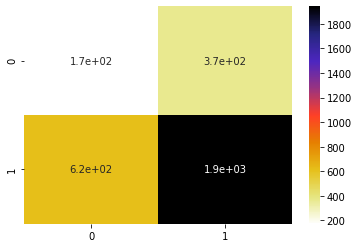

In [63]:
print(confusion_matrix(y_predic, y_test))
sns.heatmap(confusion_matrix(y_predic, y_test), annot=True,cmap=plt.cm.CMRmap_r)
plt.show

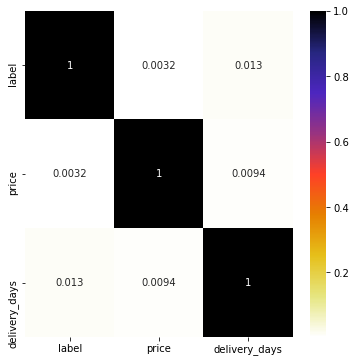

In [58]:
plt.figure(figsize=(6,6))
cor = df4.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.CMRmap_r)
plt.show()

## Check the model and predict Customer satisfaction

In [59]:
X.columns

Index(['price', 'delivery_days', 'agro_industry_and_commerce',
       'air_conditioning', 'art', 'arts_and_craftmanship', 'audio', 'auto',
       'baby', 'bed_bath_table',
       ...
       'pet_shop', 'signaling_and_security', 'small_appliances',
       'small_appliances_home_oven_and_coffee', 'sports_leisure', 'stationery',
       'tablets_printing_image', 'telephony', 'toys', 'watches_gifts'],
      dtype='object', length=129)

In [60]:
def predict(location,size,total_sqft,bath,balcony):
    location_index = np.where(X.columns==location)[0][0]

    x = np.zeros(len(X.columns))
    x[0] = size
    x[1] = total_sqft
    x[2] = bath
    x[3] = balcony
    if location_index >= 0:
        x[location_index] = 1
    return model_classifier.predict([x])[0]

In [61]:
def predict(category,price,delivery_days):
    category_index = np.where(X.columns==category)[0][0]

    x = np.zeros(len(X.columns))
    x[0] = price
    x[1] = delivery_days
    
    if category_index >= 0:
        x[category_index] = 1
    return model_classifier.predict([x])[0]

In [62]:
# prediction formate : predict("Product_Category_Name","Price","Delivery_day")
# if output is one means Positive Sentiment othewise Negative Sentiment.

predict("pet_shop",100,456)

1